In [5]:
import pandas as pd
import shapefile
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from shapely.geometry import Polygon
import numpy as np

In [6]:
leidingtrace=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/Leidingtrace_WGS84.shp")
Rioleringsdeelgebied=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/Rioleringsdeelgebied_WGS84.shp")
Rioolgemaal=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/Rioolgemaal_WGS84.shp")
RWZI=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/RWZI_WGS84.shp")
Zuiveringsregio=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/Zuiveringsregio_WGS84.shp")

Rioleringsdeelgebied.head()

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,geometry
0,CUI-CUI-BEI,1,Beijerd en 't Riet,316,0.0,0.0,"POLYGON ((5.871789942952855 51.73142778398143,..."
1,HEL-HEL-AKI,2,30. Akkers I,792,0.0,0.0,"POLYGON ((5.639777930999652 51.45550664890908,..."
2,HER-ROS-OVE,1,gebied E; Overlaet E,97,0.0,0.0,"POLYGON ((5.369862763101162 51.72400915103489,..."
3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,"POLYGON ((5.303665672444452 51.69769499520089,..."
4,HER-BRA-BRA,2,de Brand,770,0.0,0.0,"POLYGON ((5.366968395013955 51.6833809916705, ..."


In [7]:
rio_db = pd.read_excel("C:/Users/20172648/Desktop/sewer_model/20180717_dump riodat rioleringsdeelgebieden_DB.xlsx", skiprows=9)
list_codes = rio_db['Code'].tolist()
rio_db.head()
# Made a list of the Rioleeringsdeelgebieden we should consider
select_deelgebied = Rioleringsdeelgebied[pd.DataFrame(Rioleringsdeelgebied['RGDIDENT']).isin(list_codes).any(1)]
#selected those areas in our shapefile rioleeringsdeelgebieden with the list from rioleeringsdeelgebied.db
select_deelgebied.head()

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,geometry
3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,"POLYGON ((5.303665672444452 51.69769499520089,..."
9,HER-HER-TOL,1,geb. 6c Carolushof,543,0.0,0.0,"POLYGON ((5.305530586673107 51.69227701994136,..."
16,HEU-DRU-WAR,3,Wartsila,297,0.0,0.0,"POLYGON ((5.153577043237233 51.69637533371871,..."
27,HER-HER-SVL,2,Sportpark de Vliert(Sportiom),533,0.0,0.0,"POLYGON ((5.336644695444306 51.70478719903669,..."
31,HER-HER-VUG,1,Geb. 12 Vughterpoort,548,0.0,0.0,"POLYGON ((5.293400572151596 51.67667953896254,..."


In [8]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
gdf = select_deelgebied
#gdf = gdf.to_crs({'init': 'epsg:28992'})
gdf = gdf.to_crs({'init': 'epsg:4326'})

gdf['x'] = gdf.centroid.x
gdf['y'] = gdf.centroid.y
gdf.head()
#Made the coordinates readable and plotted the shapefile
#gdf['geometry'][3]

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,geometry,x,y
3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,"POLYGON ((5.303665672444452 51.69769499520089,...",5.301593,51.699136
9,HER-HER-TOL,1,geb. 6c Carolushof,543,0.0,0.0,"POLYGON ((5.305530586673107 51.69227701994136,...",5.303842,51.692047
16,HEU-DRU-WAR,3,Wartsila,297,0.0,0.0,"POLYGON ((5.153577043237233 51.69637533371871,...",5.150843,51.694462
27,HER-HER-SVL,2,Sportpark de Vliert(Sportiom),533,0.0,0.0,"POLYGON ((5.336644695444306 51.70478719903669,...",5.329350,51.701318
31,HER-HER-VUG,1,Geb. 12 Vughterpoort,548,0.0,0.0,"POLYGON ((5.293400572151597 51.67667953896254,...",5.292908,51.679716


## Now we make a grid equal the size of a cell in the .asc files

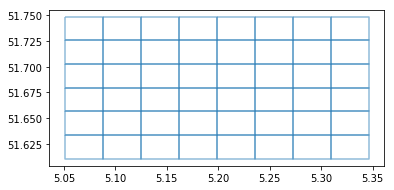

In [9]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
points = gdf

xmin,ymin,xmax,ymax = points['geometry'].total_bounds
# length and wide are equal to the size of a grid box in the 2d array of the KNMI data.
length = 0.023000000000
wide = 0.037000000000
# start is min int, end max int and step is wide/length (floats here)
cols = list(np.arange(float(5.0505), float(5.3465), wide)) 
rows = list(np.arange(float(51.6335), float(51.7485), length))
rows.reverse() # just reverses rows
#Added numbers here to make sure the lines and grids coincide with actual latitude/longitude lines
polygons = []
for x in cols:
    for y in rows:
        polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y-length), (x, y-length)]))

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid_coordinates_moved.shp")
r = gpd.read_file("grid_coordinates_moved.shp")
#r = r.to_crs({'init': 'epsg:4326'})

r.boundary.plot(alpha=0.5)

Populating the interactive namespace from numpy and matplotlib


C:\Users\20172648\AppData\Local\conda\conda\envs\my_root\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Polygon', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


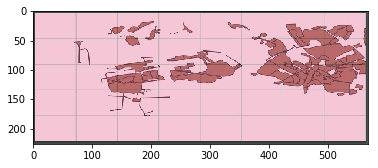

In [10]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2=mpimg.imread('QGIS GRID.png')
imgplot = plt.imshow(img2)
plt.show()

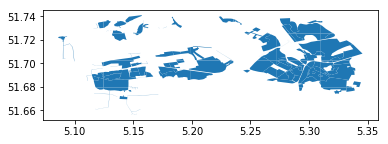

In [14]:
#intersected Grid_coordinates_moved.shp with Selectdeelgebied.shp and then calculating the areas of each area including 
#those that were sliced by the grid

intersection=gpd.read_file("final_intersection.shp")
hist_rain_total = pd.read_csv('rain_timeseries/rainfall_ts_combined.csv', sep=',')
intersection # FID here tells us which cell to use from the knmi data/grid starting at 0 and 
#ending at 47 (6x8 cells)
intersection.plot()

# Made a function that cleans the file, loads it to a dataframe, selects correct cells and multiplies the cell by the area with the corresponding FID

In [13]:
import pandas as pd
import shapefile
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from shapely.geometry import Polygon
import numpy as np

#opening an .asc file as 2d array
def clean_file(file):
    array2D = []
    with open(file) as f:
        for line in f.readlines()[7:]:
                array2D.append(line.split(' '))

    #load 2d array into a dataframe, string values in each cell
    knmi = pd.DataFrame(array2D)

    # clean the file, remove spaces, and add longitutde and latitude as index and column names
    knmi = knmi.drop(knmi.columns[0], axis = 1)
    knmi.columns = np.arange(-0.018500000000, 11.0815, 0.037)

    # good amount of columns (300)
    knmi = knmi.replace('\n',' ', regex=True) 
    latitude = np.arange(49.0115, 55.9115, 0.023)
    latitude_index = latitude[::-1]
    knmi = knmi.set_index(latitude_index)

    # Now lets select the the longitutde and latitude we need (we eventually used this for the grid)
    knmi = knmi.loc[:, 5.0405:5.3105]
    knmi = knmi.loc[51.7486:51.625]
    
    # Negative values are errors in data, changing data to floats and setting negatives to 0
    knmi = knmi.astype(float)
    knmi = knmi[knmi >= 0]
    knmi.fillna(0, inplace=True)
    timestamps = file.split("_")
    eind = timestamps[-1]
    eind = eind[:-4]
    begin = timestamps[-2]
    
    # now lets make a list of all the values, indexed from 0-47 which corresponds to intersection['FID']
    # intersection['FID'] also is indexed 0-47
    r = []
    shape = list(knmi.shape)
    for row in range(0,shape[0]):
        for col in range(0, shape[1]):
            r.append(float(knmi.iloc[row,col]))

    # taking a subset of each unique area code, and multiplying them by the corresponding grid cell in the list (r)
    # then we sum them up, since we wanted to get the total rainfall of each area but the grid divided it into multiple rainfall data
    intersection=gpd.read_file("C:/Users/20172648/Desktop/sewer_data/final_intersection.shp")
    rainfall = []
    rgdident = []
    naamrgd = []
    measurement_begin = []
    measurement_eind = []
    for i in intersection['RGDIDENT'].unique():
        subset = intersection[intersection['RGDIDENT']== i] #make a subset df for each unique area code
        total = 0
        for index, row in subset.iterrows():
            ID = row['FID']
            x = row['Area'] * r[ID]/1000 # times the corresponding cell from knmi rainfall predictions
            code = row['RGDIDENT']
            total = total + x # total rain for the area
        rainfall.append(total)
        rgdident.append(i)
        naamrgd.append(subset['NAAMRGD'].unique())
        measurement_begin.append(begin)
        measurement_eind.append(eind)
    dict_df = {"Rainfall": rainfall, "RGDIDENT": rgdident, "NAAMRGD": naamrgd, 'measurement_begin': measurement_begin, "measurement_eind": measurement_eind}
    knmi_df_new = pd.DataFrame(data=dict_df)
    
    return knmi_df_new



# Load the function for each file and add them to 1 big csv

In [ ]:
#attempt to make a csv from each asc file
folder = 'rain_grid_prediction'
#put your notebook in the sewer data folder
import pandas as pd
import os

current_dir = os.path.dirname(os.path.abspath("__file__"))
    
folder_path = current_dir + "\\" + folder
    
script_test = 0
    
if os.path.exists(folder_path):
    df = pd.DataFrame()   
    script_test = 1
        
    for file in os.listdir(folder_path):
        if 'overall' not in file:
            print('converting: ' + file + ' to dataframe')
            file = folder_path + '\\' + file
            knmi_df_new = clean_file(file)
            df_temp = knmi_df_new
            df = pd.concat([df, df_temp])

df.to_csv(folder_path + '\\' + folder + '_overall.csv', index=False, sep=',')

if script_test != 1:
    print('No folder with data found to extract. Check script file location.')
    
else:
    print('CSV conversion succesful.')

In [3]:
s = pd.read_csv('rain_grid_prediction/rain_grid_prediction_overall.csv')
s.head()

,Rainfall,RGDIDENT,NAAMRGD,measurement_begin,measurement_eind
0,24.875805,HER-HER-ORP,['Geb. 8 Orthenpoort'],2018-01-02T00h00m00s,2018-01-02T01h00m00s
1,3.737282,HER-HER-TOL,['geb. 6c Carolushof'],2018-01-02T00h00m00s,2018-01-02T01h00m00s
2,18.002960,HEU-DRU-WAR,['Wartsila'],2018-01-02T00h00m00s,2018-01-02T01h00m00s
3,77.505724,HER-HER-SVL,['Sportpark de Vliert(Sportiom)'],2018-01-02T00h00m00s,2018-01-02T01h00m00s
4,14.712031,HER-HER-VUG,['Geb. 12 Vughterpoort'],2018-01-02T00h00m00s,2018-01-02T01h00m00s


# IGNORE BELOW

In [ ]:
pumpdata_150 = pd.read_csv("data_pump/RG8150/_overall.csv", sep=';', decimal=',')
pump150_clean = pumpdata_150[pumpdata_150['DataQuality'] == 'Good']

In [ ]:
pump150_clean['datetime'] = pd.to_datetime(pump150_clean['TimeStamp'])
pump150_clean = pump150_clean.set_index('datetime')
pump150_clean.head()

In [ ]:
randomday = pump150_clean['2018-06-25']
randomday

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
sns.set(rc={'figure.figsize':(40, 18)})
days = list(calendar.day_name)
data = pump150_clean.loc[pump150_clean['Tagname'].str.contains("Debietmeting"),]
data_mean = pump150_clean['Value'].resample('D').mean()
mean_daily_flow = data_mean.to_frame()
ax = mean_daily_flow.plot()
ax.set_xlabel('Time', fontsize=30)
ax.set_ylabel('Mean Flow Cubic Metre', fontsize=30)
ax

In [ ]:
data['Value'].mean()

In [ ]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
data['weekday'] = data["TimeStamp"].dt.dayofweek

In [ ]:
for i in range(7):
    plt.figure()
    df = data[data['weekday']==i]
    df = df.groupby(df.index.hour)['Value'].mean()
    df.plot(lw=2)
    plt.xlabel('hour', fontsize=24)
    plt.ylabel("debietingmeting", fontsize=22)
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.title('24 hours of ' + "Debiemeting" + ' ' + "RG8150" + ' ' + days[i],
        size=26)
    plt.savefig('24 hours of ' + "Debietmeting" + ' ' + "RG8150" + ' ' + \
        days[i] + '.png')

In [ ]:
mean_day = data[data['weekday']==6]
mean_day['Value'].mean()

In [ ]:
data['month'] = data["TimeStamp"].dt.month
data.head()

### New data, objective 2

In [ ]:
import pandas as pd

In [ ]:
raindf = pd.read_csv('rain_timeseries/rain_timeseries_overall.csv', sep=',')
#new_header = raindf.iloc[1] #grab the first row for the header
#raindf = raindf[2:]
#raindf.columns = new_header
raindf.head()
#new_header

In [ ]:
raindata_bok_clean = raindf[['Bokhoven', 'Begin', 'Eind']] #according to data_overview_rzwi_denbosch  this one is connected to RG8180_q0
raindata_bok_clean['Begin'] = pd.to_datetime(raindata_bok_clean['Begin'], errors='ignore')
raindata_bok_clean['Eind'] = pd.to_datetime(raindata_bok_clean['Eind'], errors='ignore')
raindata_bok_clean = raindata_bok_clean.set_index('Eind')

pump_bok = pd.read_csv("data_pump\RG8180_Q0\RG8180_Q0_overall.csv")
pump_bok_clean = pump_bok.loc[pump_bok['historianTagnummer'].str.contains("Debietmeting"),]
pump_bok_clean['begin'] = pd.to_datetime(pump_bok_clean['datumBeginMeting'], errors='ignore')
pump_bok_clean['eind'] = pd.to_datetime(pump_bok_clean['datumEindeMeting'], errors='ignore')
pump_bok_clean['index'] = pump_bok_clean['eind']
pump_bok_clean = pump_bok_clean.set_index("index")

In [ ]:
#Check if the data is indeed 1 min apart and there are no gaps or bad data.

#its clean but the rain data has some measurements over an hour and some over 5 mins

import time
import datetime as dt
for index, row in pump_bok_clean.iterrows():
    s = row['eind']
    d = row['begin']
    x = s - d
    duration = x.total_seconds()
    if duration != 60:
        print("this line is bad:", index)

In [ ]:
raindata_bok_clean= raindata_bok_clean.sort_values(by='Eind')
aq1 = raindata_bok_clean['2018-01-01 00:00:00' :'2019-08-24 00:00:00']

In [ ]:
pump_bok_clean = pump_bok_clean.sort_values(by='index')
# just need the rain data 2019-08-24 00:00:00 - 2018-01-01 00:01:00	

In [ ]:
# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 20, 10  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [ ]:
daily_flow_bok = pump_bok_clean['hstWaarde'].resample('D').mean()
ax = aq1['Bokhoven'].plot()
daily_flow_bok.plot(ax=ax)
ax.legend(['Rain water', 'Flow'])

## Over een maand

In [ ]:
rain_one_month = raindata_bok_clean['2018-01-01 00:00:00' :'2018-02-01 00:00:00']
pump_bok_one_month = pump_bok_clean['2018-01-01 00:00:00' :'2018-02-01 00:00:00']
daily_flow_one_month = pump_bok_one_month['hstWaarde'].resample('D').mean()
ax = rain_one_month['Bokhoven'].plot()
daily_flow_one_month.plot(ax=ax)
ax.legend(['Rain water', 'Flow'])

## open knmi en match het op de echte gemete data
## hoe betrouwbaar is de voorspelling
## voor iedere locatie kijken en linken naar de pomp